<font size=8>Project1A</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
price=pd.read_csv('stockprices(2021).csv', index_col=0)

In [4]:
price.head()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,WTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,171.869995,118.040001,226.660004,129.410004,202.720001,182.149994,84.709999,43.959999,52.759998,177.679993,...,203.699997,106.900002,65.660004,142.429993,99.690002,105.820000,378.130005,153.160004,42.930000,163.589996
2021-01-05,171.580002,118.669998,227.759995,131.009995,211.630005,183.639999,87.000000,43.980000,52.180000,178.440002,...,202.000000,110.190002,65.019997,144.229996,99.570000,105.830002,380.570007,155.809998,43.610001,164.729996
2021-01-06,174.190002,123.059998,233.250000,126.599998,211.029999,193.860001,89.800003,44.400002,50.520000,179.119995,...,203.699997,110.849998,66.459999,141.220001,103.769997,106.410004,394.820007,160.250000,48.509998,167.149994
2021-01-07,169.720001,121.660004,234.020004,130.919998,212.710007,194.229996,90.220001,44.959999,49.959999,178.580002,...,205.250000,109.750000,65.160004,149.710007,108.480003,105.599998,409.100006,159.300003,49.990002,167.000000
2021-01-08,166.619995,121.779999,238.490005,132.050003,209.899994,194.259995,91.080002,45.060001,51.080002,178.690002,...,203.639999,109.029999,65.760002,147.990005,107.379997,107.150002,405.470001,158.949997,48.720001,168.110001


In [5]:
Dow_Jones=price.iloc[:,:30]
Dow_Jones=Dow_Jones.fillna(Dow_Jones.mean())

<font size=5>30 stocks of Dow_jones index</font>

In [6]:
Dow_Jones.head(5)

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,171.869995,118.040001,226.660004,129.410004,202.720001,182.149994,84.709999,43.959999,52.759998,177.679993,...,217.690002,140.100006,137.820007,220.309998,135.649994,349.500000,58.849998,217.759995,41.400002,146.529999
2021-01-05,171.580002,118.669998,227.759995,131.009995,211.630005,183.639999,87.000000,43.980000,52.180000,178.440002,...,217.899994,141.229996,138.699997,221.520004,134.529999,344.799988,58.580002,214.509995,41.160000,145.750000
2021-01-06,174.190002,123.059998,233.250000,126.599998,211.029999,193.860001,89.800003,44.400002,50.520000,179.119995,...,212.250000,142.350006,140.160004,216.149994,139.100006,359.269989,59.290001,212.619995,43.029999,146.660004
2021-01-07,169.720001,121.660004,234.020004,130.919998,212.710007,194.229996,90.220001,44.959999,49.959999,178.580002,...,218.289993,144.949997,138.850006,217.979996,139.070007,365.029999,58.529999,213.809998,45.259998,146.649994
2021-01-08,166.619995,121.779999,238.490005,132.050003,209.899994,194.259995,91.080002,45.060001,51.080002,178.690002,...,219.619995,146.350006,138.789993,222.039993,139.649994,363.390015,57.799999,215.449997,45.209999,146.630005


In [7]:
return_data=(Dow_Jones-Dow_Jones.shift(1))/Dow_Jones.shift(1)
return_data=return_data.dropna()

In [8]:
return_data.head(5)

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,-0.001687,0.005337,0.004853,0.012364,0.043952,0.008180,0.027033,0.000455,-0.010993,0.004277,...,0.000965,0.008066,0.006385,0.005492,-0.008257,-0.013448,-0.004588,-0.014925,-0.005797,-0.005323
2021-01-06,0.015212,0.036993,0.024104,-0.033662,-0.002835,0.055652,0.032184,0.009550,-0.031813,0.003811,...,-0.025929,0.007930,0.010526,-0.024242,0.033970,0.041966,0.012120,-0.008811,0.045432,0.006244
2021-01-07,-0.025662,-0.011377,0.003301,0.034123,0.007961,0.001909,0.004677,0.012613,-0.011085,-0.003015,...,0.028457,0.018265,-0.009346,0.008466,-0.000216,0.016033,-0.012818,0.005597,0.051824,-0.000068
2021-01-08,-0.018265,0.000986,0.019101,0.008631,-0.013211,0.000154,0.009532,0.002224,0.022418,0.000616,...,0.006093,0.009659,-0.000432,0.018626,0.004170,-0.004493,-0.012472,0.007670,-0.001105,-0.000136
2021-01-11,-0.008522,-0.005912,-0.003858,-0.023249,-0.014817,-0.002059,0.005709,0.006658,-0.017228,0.002238,...,-0.009699,0.004783,-0.006773,-0.017069,-0.015897,-0.007265,-0.005882,-0.011882,0.055076,0.004501


In [9]:
from sklearn import preprocessing 
scaled = preprocessing.scale(return_data)


<font size=5> normalization and standardize index</font>

In [10]:
scaled=pd.DataFrame(scaled)

In [11]:
scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.160394,0.220999,0.381653,0.697972,1.953967,0.468226,1.635961,-0.089143,-1.216520,0.301435,...,-0.064975,0.410018,0.618091,0.268655,-0.657613,-1.238228,-0.450441,-0.989493,-0.395249,-0.508228
1,1.275296,2.023465,1.911439,-2.228066,-0.136544,3.413854,1.964959,0.664537,-3.419402,0.271523,...,-2.104732,0.402343,1.070324,-1.408131,2.456652,3.346742,1.370130,-0.586756,2.552890,0.595065
2,-2.197204,-0.730658,0.258337,2.081323,0.345840,0.079081,0.207914,0.918340,-1.226213,-0.165979,...,2.020167,0.989020,-1.099799,0.436371,-0.064592,1.200977,-1.347268,0.362307,2.920727,-0.006990
3,-1.568837,-0.026733,1.513848,0.460682,-0.600126,-0.029761,0.518048,0.057475,2.318611,0.066742,...,0.323969,0.500450,-0.126360,1.009279,0.258890,-0.497285,-1.309550,0.498893,-0.125211,-0.013482
4,-0.741089,-0.419533,-0.310529,-1.566082,-0.671886,-0.167108,0.273846,0.424875,-1.876201,0.170742,...,-0.873717,0.223669,-0.818748,-1.003642,-1.221100,-0.726659,-0.591492,-0.789071,3.107875,0.428852


In [12]:
scaled.index=return_data.index

In [13]:
scaled.columns=return_data.columns.tolist()

In [14]:
scaled.head(5)

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DIS,...,MSFT,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,-0.160394,0.220999,0.381653,0.697972,1.953967,0.468226,1.635961,-0.089143,-1.216520,0.301435,...,-0.064975,0.410018,0.618091,0.268655,-0.657613,-1.238228,-0.450441,-0.989493,-0.395249,-0.508228
2021-01-06,1.275296,2.023465,1.911439,-2.228066,-0.136544,3.413854,1.964959,0.664537,-3.419402,0.271523,...,-2.104732,0.402343,1.070324,-1.408131,2.456652,3.346742,1.370130,-0.586756,2.552890,0.595065
2021-01-07,-2.197204,-0.730658,0.258337,2.081323,0.345840,0.079081,0.207914,0.918340,-1.226213,-0.165979,...,2.020167,0.989020,-1.099799,0.436371,-0.064592,1.200977,-1.347268,0.362307,2.920727,-0.006990
2021-01-08,-1.568837,-0.026733,1.513848,0.460682,-0.600126,-0.029761,0.518048,0.057475,2.318611,0.066742,...,0.323969,0.500450,-0.126360,1.009279,0.258890,-0.497285,-1.309550,0.498893,-0.125211,-0.013482
2021-01-11,-0.741089,-0.419533,-0.310529,-1.566082,-0.671886,-0.167108,0.273846,0.424875,-1.876201,0.170742,...,-0.873717,0.223669,-0.818748,-1.003642,-1.221100,-0.726659,-0.591492,-0.789071,3.107875,0.428852


<font size=5>Use the principal component analysis to construct the eigen-portfolios.</font>

In [15]:
pca = PCA(10).fit(scaled)

<font size=5>Plot the eigen-portfolios corresponding to the first 10 principle components.</font>

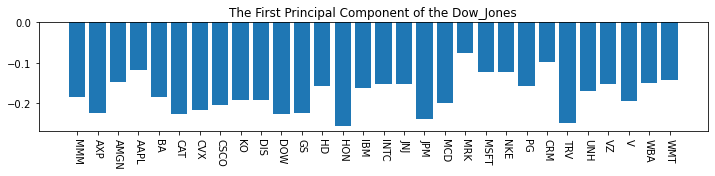

In [16]:
plt.figure(figsize=(12,2))
plt.bar(scaled.columns,pca.components_[0])
plt.xticks(rotation=270)
plt.title('The First Principal Component of the Dow_Jones')
plt.show()

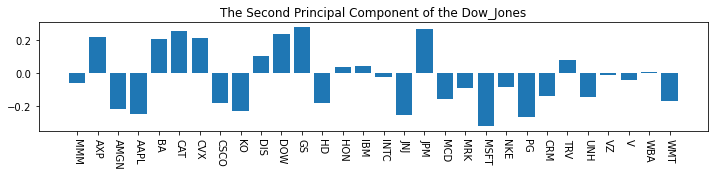

In [17]:
plt.figure(figsize=(12,2))
plt.bar(scaled.columns,pca.components_[1])
plt.xticks(rotation=270)
plt.title('The Second Principal Component of the Dow_Jones')
plt.show()

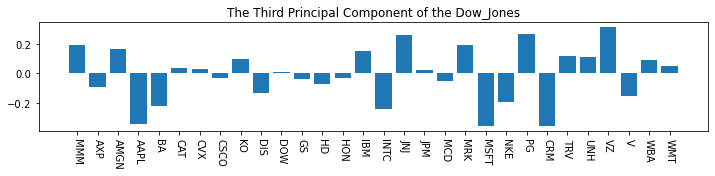

In [18]:
plt.figure(figsize=(12,2))
plt.bar(scaled.columns,pca.components_[2])
plt.xticks(rotation=270)
plt.title('The Third Principal Component of the Dow_Jones')
plt.show()

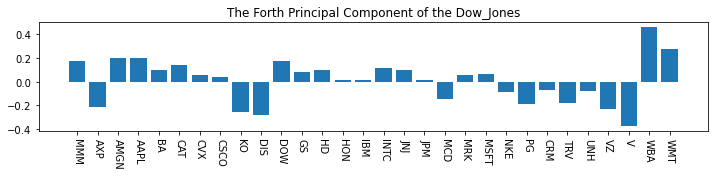

In [19]:
plt.figure(figsize=(12,2))
plt.bar(scaled.columns,pca.components_[3])
plt.xticks(rotation=270)
plt.title('The Forth Principal Component of the Dow_Jones')
plt.show()

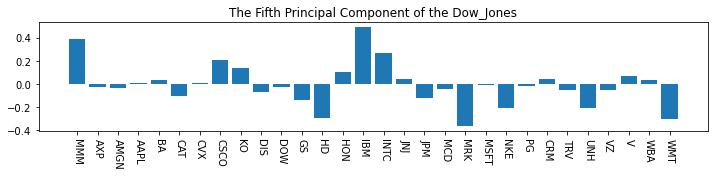

In [20]:
plt.figure(figsize=(12,2))
plt.bar(scaled.columns,pca.components_[4])
plt.xticks(rotation=270)
plt.title('The Fifth Principal Component of the Dow_Jones')
plt.show()

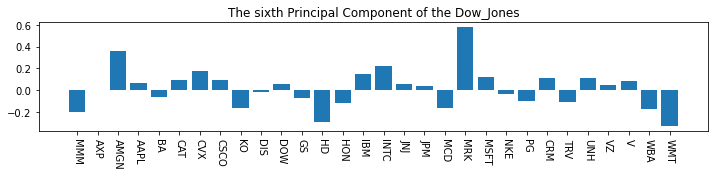

In [21]:
plt.figure(figsize=(12,2))
plt.bar(scaled.columns,pca.components_[5])
plt.xticks(rotation=270)
plt.title('The sixth Principal Component of the Dow_Jones')
plt.show()


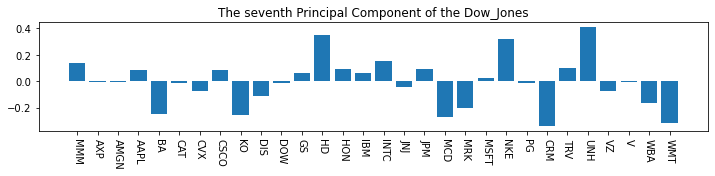

In [22]:
plt.figure(figsize=(12,2))
plt.bar(scaled.columns,pca.components_[6])
plt.xticks(rotation=270)
plt.title('The seventh Principal Component of the Dow_Jones')
plt.show()



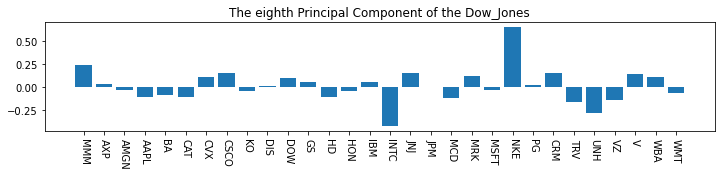

In [23]:
plt.figure(figsize=(12,2))
plt.bar(scaled.columns,pca.components_[7])
plt.xticks(rotation=270)
plt.title('The eighth Principal Component of the Dow_Jones')
plt.show()



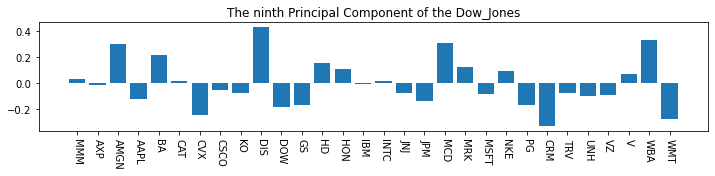

In [24]:
plt.figure(figsize=(12,2))
plt.bar(scaled.columns,pca.components_[8])
plt.xticks(rotation=270)
plt.title('The ninth Principal Component of the Dow_Jones')
plt.show()



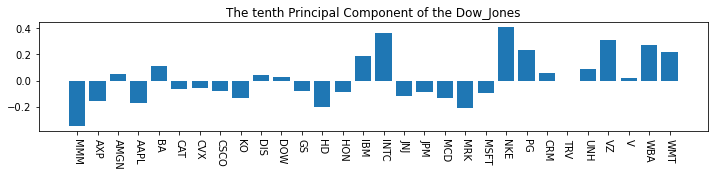

In [25]:
plt.figure(figsize=(12,2))
plt.bar(scaled.columns,pca.components_[9])
plt.xticks(rotation=270)
plt.title('The tenth Principal Component of the Dow_Jones')
plt.show()



<font size=5>plot the explained variance ratios of ten components</font>

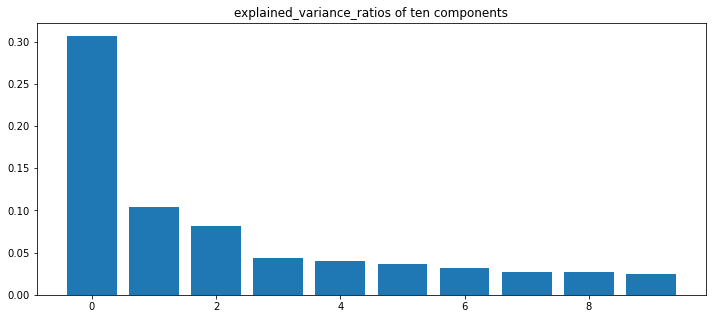

In [26]:
plt.figure(figsize=(12,5))
plt.bar(range(10),pca.explained_variance_ratio_)
plt.title('explained_variance_ratios of ten components')
plt.show()

In [27]:
print(pca.explained_variance_ratio_)

[0.30692144 0.10384594 0.08211147 0.04413214 0.0404454  0.03614155
 0.03202695 0.0270596  0.02645347 0.02500142]


<font size=8>B

<font size=4>(b)Use the K-means model to separate the 503 stocks into K clusters using r and $\sigma$ as the variables, where K = 6; 8; 10. Show the results on the plane with the
annual return and volatility being the two coordinate axis.

In [28]:
data_b=pd.read_csv('stockprices(2021).csv', index_col=0)

In [29]:
data_b=data_b.fillna(data_b.mean())

In [30]:
return_b=(data_b-data_b.shift(1))/data_b.shift(1)
return_b=return_b.dropna()

In [31]:
mean_data=return_b.mean()*252

In [32]:
std_b=return_b.std()*np.sqrt(252)

In [33]:
mean_data=pd.DataFrame(mean_data,columns=['mean'])
std_b=pd.DataFrame(std_b,columns=['std'])

<font size=5>reduce the demension by calculating mean and std

In [34]:
k_data=pd.merge(mean_data,std_b,left_index=True, right_index=True)

<font size=5>calculate the SSE of k-means clusters respectively (6,8,10)

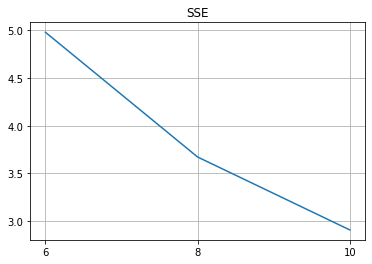

In [35]:
from sklearn.cluster import KMeans
X = k_data
distortions = []
for k in [6,8,10]:
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)
    
labels=[6,8,10]
x_a=range(3)
plt.plot(x_a, distortions)
plt.xticks(x_a,labels)

plt.grid(True)
plt.title('SSE')
plt.show()

For each value of K, compute the in-cluster variance:

In [36]:
print(distortions)

[4.977358795710036, 3.6723547216016335, 2.9096451926598714]


<font size=4>In the above plot, we can see the SSE decreases as cluster numbers increases.

<font size=4>Show the results on the plane with the annual return and volatility being the two coordinate axis.

<Figure size 432x288 with 0 Axes>

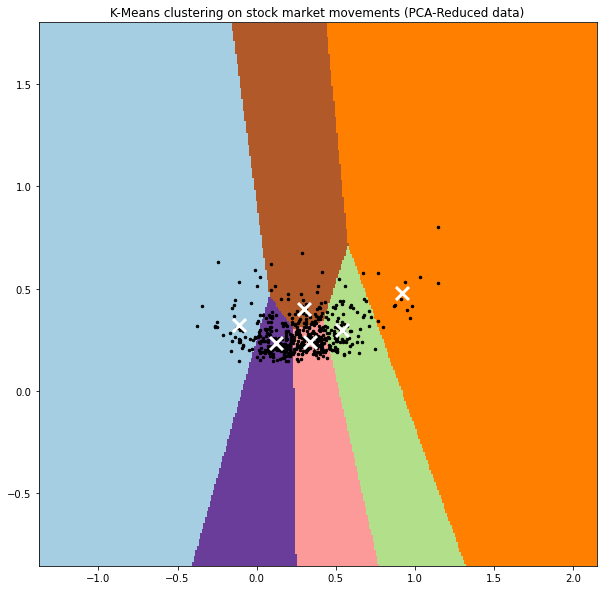

In [37]:
#computing K-Means with K = 6 (6 clusters)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = k_data.iloc[:,0].min()-1, k_data.iloc[:,0].max() + 1
y_min,y_max = k_data.iloc[:,1].min()-1, k_data.iloc[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
kmeans = KMeans(n_clusters=6)
kmeans.fit(k_data)
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(k_data.iloc[:,0],k_data.iloc[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

<Figure size 432x288 with 0 Axes>

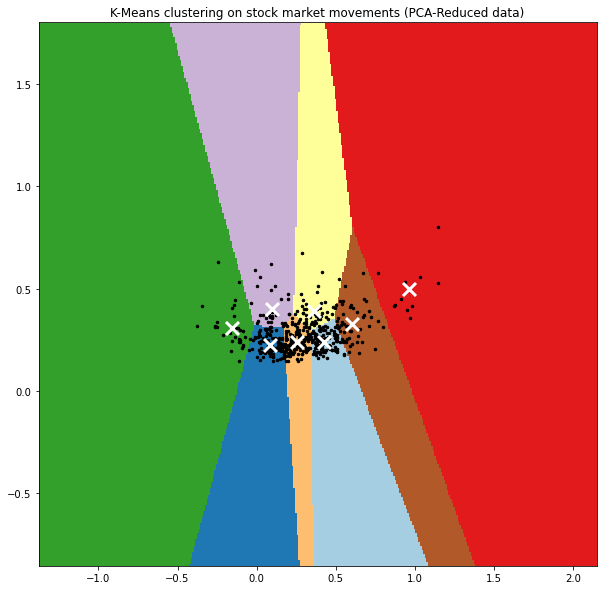

In [38]:
#computing K-Means with K = 8 (8 clusters)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = k_data.iloc[:,0].min()-1, k_data.iloc[:,0].max() + 1
y_min,y_max = k_data.iloc[:,1].min()-1, k_data.iloc[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
kmeans = KMeans(n_clusters=8)
kmeans.fit(k_data)
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(k_data.iloc[:,0],k_data.iloc[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()

<Figure size 432x288 with 0 Axes>

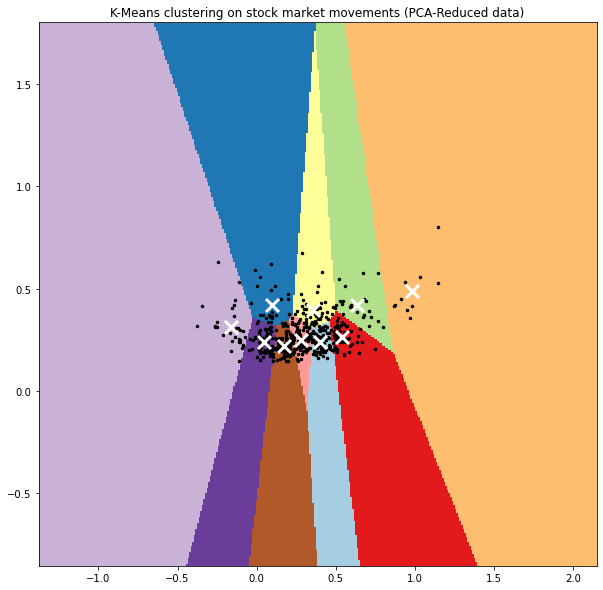

In [39]:
#computing K-Means with K = 10 (10 clusters)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = k_data.iloc[:,0].min()-1, k_data.iloc[:,0].max() + 1
y_min,y_max = k_data.iloc[:,1].min()-1, k_data.iloc[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
kmeans = KMeans(n_clusters=10)
kmeans.fit(k_data)
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired
# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(k_data.iloc[:,0],k_data.iloc[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()